<a href="https://colab.research.google.com/github/SefiyeArican/plant_seedlings_classification/blob/main/plant_seedlings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/plant-seedlings-classification.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
import os

# Veri setinin bulunduğu dizin
data_dir = '/content'

# Train sınıfı ve alt sınıflar için
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Sınıf: {class_name}")
        # Sınıf dizinindeki alt dizinlerin listesi
        sub_classes = [sub_class for sub_class in os.listdir(class_dir) if os.path.isdir(os.path.join(class_dir, sub_class))]
        for sub_class_name in sub_classes:
            sub_class_dir = os.path.join(class_dir, sub_class_name)
            print(f"Alt Sınıf: {sub_class_name}")
            image_files = [file for file in os.listdir(sub_class_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
            if image_files:
                print(f"{len(image_files)} görüntü dosyası bulundu.")
            # else:
            #     print("Bu alt sınıfta görüntü dosyası bulunamadı.")
    # else:
    #     print(f"{class_name} bir sınıf dizini değil.")

print(" ")
# Test sınıfı için
test_dir = os.path.join(data_dir, 'test')
if os.path.isdir(test_dir):
    image_files = [file for file in os.listdir(test_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
    if image_files:
        print(f"Sınıf: test")
        print(f"{len(image_files)} görüntü dosyası bulundu.")
#     else:
#         print("Test sınıfında görüntü dosyası bulunamadı.")
# else:
#     print("Test sınıfı bulunamadı.")

Sınıf: .config
Alt Sınıf: configurations
Alt Sınıf: logs
Sınıf: drive
Alt Sınıf: .shortcut-targets-by-id
Alt Sınıf: .file-revisions-by-id
Alt Sınıf: MyDrive
Alt Sınıf: .Trash-0
Sınıf: train
Alt Sınıf: Charlock
390 görüntü dosyası bulundu.
Alt Sınıf: Shepherds Purse
231 görüntü dosyası bulundu.
Alt Sınıf: Loose Silky-bent
654 görüntü dosyası bulundu.
Alt Sınıf: Common wheat
221 görüntü dosyası bulundu.
Alt Sınıf: Scentless Mayweed
516 görüntü dosyası bulundu.
Alt Sınıf: Sugar beet
385 görüntü dosyası bulundu.
Alt Sınıf: Black-grass
263 görüntü dosyası bulundu.
Alt Sınıf: Fat Hen
475 görüntü dosyası bulundu.
Alt Sınıf: Maize
221 görüntü dosyası bulundu.
Alt Sınıf: Small-flowered Cranesbill
496 görüntü dosyası bulundu.
Alt Sınıf: Common Chickweed
611 görüntü dosyası bulundu.
Alt Sınıf: Cleavers
287 görüntü dosyası bulundu.
Sınıf: test
Sınıf: sample_data
 
Sınıf: test
794 görüntü dosyası bulundu.


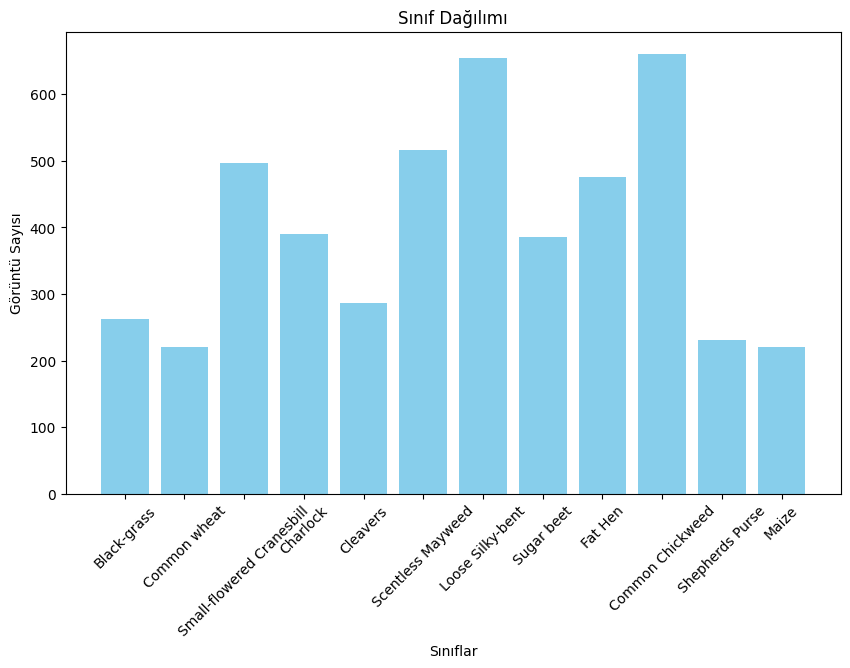

In [ ]:
import matplotlib.pyplot as plt

# Sınıf adları ve sınıf içindeki görüntü sayıları
class_names = ['Black-grass','Common wheat', 'Small-flowered Cranesbill', 'Charlock', 'Cleavers', 'Scentless Mayweed',
              'Loose Silky-bent', 'Sugar beet', 'Fat Hen', 'Common Chickweed', 'Shepherds Purse', 'Maize']
class_counts = [263, 221, 496, 390, 287, 516, 654, 385, 475, 661, 231, 221]

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')
plt.title('Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()


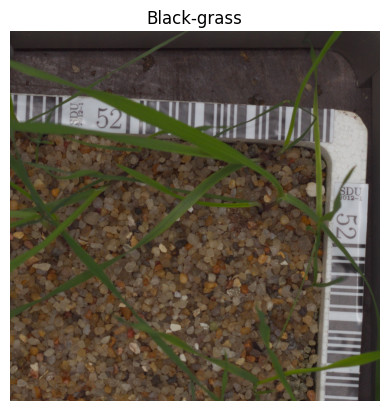

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content'

# train sınıfının 12 alt sınıfı olduğu için train ve test ana sınıflarını ayrı ayrı çekmemiz gerekiyor.
# train sınıfı verileri
class_train =  os.path.join(data_dir, 'train')
train_sub_classes = [sub_class for sub_class in os.listdir(class_train) if os.path.isdir(os.path.join(class_train, sub_class))]

# test sınıfı verileri
class_test = os.path.join(data_dir, 'test')

# Rastgele olarak 'train' alt sınıflarından veya 'test' sınıfından bir veri seçme işlemi
all_classes = ['test'] + train_sub_classes
selected_class = random.choice(all_classes)

# seçilecek ana sınıfa göre dosya yolu oluşturuyoruz.
if selected_class == 'test':
    selected_class_path = class_test
else:
    selected_class_path = os.path.join(class_train, selected_class)

sample_image_path = os.path.join(selected_class_path, random.choice(os.listdir(selected_class_path)))

image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.title(selected_class)
plt.show()


In [5]:
import os
import cv2

data_dir = '/content/train'

def get_image_sizes(directory):
    sizes = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                if image is not None:
                    sizes.append(image.shape)
                else:
                    print(f"okunamayan görüntünün yolu: {image_path}")
    return sizes

# Tüm görüntülerin boyutlarını alma
image_sizes = get_image_sizes(data_dir)

# Boyut bilgilerini yazdırma işlemi
for size in image_sizes:
    print(f"Width: {size[1]}, Height: {size[0]}, Channels: {size[2]}")

# Benzersiz boyutları yazdırma
unique_sizes = set(image_sizes)
print("\nUnique image sizes in the dataset:")
for size in unique_sizes:
    print(f"Width: {size[1]}, Height: {size[0]}, Channels: {size[2]}")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Width: 1035, Height: 1035, Channels: 3
Width: 163, Height: 163, Channels: 3
Width: 401, Height: 401, Channels: 3
Width: 194, Height: 194, Channels: 3
Width: 196, Height: 196, Channels: 3
Width: 530, Height: 530, Channels: 3
Width: 150, Height: 150, Channels: 3
Width: 135, Height: 135, Channels: 3
Width: 375, Height: 375, Channels: 3
Width: 311, Height: 311, Channels: 3
Width: 183, Height: 183, Channels: 3
Width: 1038, Height: 1038, Channels: 3
Width: 371, Height: 371, Channels: 3
Width: 484, Height: 484, Channels: 3
Width: 153, Height: 153, Channels: 3
Width: 185, Height: 185, Channels: 3
Width: 198, Height: 198, Channels: 3
Width: 425, Height: 425, Channels: 3
Width: 581, Height: 581, Channels: 3
Width: 1582, Height: 1582, Channels: 3
Width: 155, Height: 155, Channels: 3
Width: 426, Height: 426, Channels: 3
Width: 226, Height: 226, Channels: 3
Width: 424, Height: 424, Channels: 3
Width: 168, Height: 168, Channels: 3
Width: 210, Height: 21

In [6]:
import cv2
import os

# Veri setinin bulunduğu dizin
data_dir = '/content/train'

# Yeşil kanalı ayırmak için bir fonksiyon
def extract_green_channel(image_path):
    # Görüntüyü yükleme
    image = cv2.imread(image_path)
    # Yeşil kanalı alma
    green_channel = image[:, :, 1]  # Yeşil kanal, RGB'de 1. indekstir
    return green_channel

# Veri setindeki tüm görüntüler için yeşil kanalı ayırma işlmei
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Sınıf: {class_name}")
        # Sınıf dizinindeki tüm görüntüler için yeşil kanalı ayır
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            green_channel = extract_green_channel(image_path)
            cv2.imwrite('/content/green_channel.jpg', green_channel) # Yeşil kanal görüntüsünü kaydetme işlemi
            print(f"Yeşil Kanal Görüntü Boyutu: {green_channel.shape}")
    else:
        print(f"{class_name} bir sınıf dizini değil.")


Sınıf: Fat Hen
Yeşil Kanal Görüntü Boyutu: (108, 108)
Yeşil Kanal Görüntü Boyutu: (263, 263)
Yeşil Kanal Görüntü Boyutu: (641, 641)
Yeşil Kanal Görüntü Boyutu: (368, 368)
Yeşil Kanal Görüntü Boyutu: (293, 293)
Yeşil Kanal Görüntü Boyutu: (370, 370)
Yeşil Kanal Görüntü Boyutu: (340, 340)
Yeşil Kanal Görüntü Boyutu: (428, 428)
Yeşil Kanal Görüntü Boyutu: (892, 892)
Yeşil Kanal Görüntü Boyutu: (592, 592)
Yeşil Kanal Görüntü Boyutu: (178, 178)
Yeşil Kanal Görüntü Boyutu: (169, 169)
Yeşil Kanal Görüntü Boyutu: (426, 426)
Yeşil Kanal Görüntü Boyutu: (289, 289)
Yeşil Kanal Görüntü Boyutu: (156, 156)
Yeşil Kanal Görüntü Boyutu: (184, 184)
Yeşil Kanal Görüntü Boyutu: (174, 174)
Yeşil Kanal Görüntü Boyutu: (380, 380)
Yeşil Kanal Görüntü Boyutu: (202, 202)
Yeşil Kanal Görüntü Boyutu: (209, 209)
Yeşil Kanal Görüntü Boyutu: (308, 308)
Yeşil Kanal Görüntü Boyutu: (325, 325)
Yeşil Kanal Görüntü Boyutu: (497, 497)
Yeşil Kanal Görüntü Boyutu: (736, 736)
Yeşil Kanal Görüntü Boyutu: (525, 525)
Yeşil Kana

Her bir alt train sınıfını için görüntülerin ortalama yeşil kanal görüntü boyutunu bulma işlemi

In [3]:
# Yeşil Kanal Görüntü Boyutlarını zaten hesapladıktan sonra ortalama boyutları hesaplama ve çıktı verme
# Sınıf başına yeşil kanal görüntü boyutlarını tutmak için bir sözlük
class_sizes = {
    # 'class_name': [(height1, width1), (height2, width2), ...]
}

# Veri setindeki tüm sınıflar için ortalama yeşil kanal boyutlarını hesaplama
for class_name, sizes in class_sizes.items():
    total_height = sum(size[0] for size in sizes)
    total_width = sum(size[1] for size in sizes)
    image_count = len(sizes)

    # Ortalama boyutları hesaplama
    if image_count > 0:
        avg_height = total_height / image_count
        avg_width = total_width / image_count
        class_sizes[class_name] = (avg_height, avg_width)
    else:
        class_sizes[class_name] = (0, 0)

# Sonuçları yazdırma
for class_name, avg_size in class_sizes.items():
    print(f"{class_name} sınıfının ortalama yeşil kanal boyutu: {avg_size}")



In [7]:
import os

# Önceki hücrede yeşil kanal boyutlarını yazdıran kodu çalıştırdıktan sonra bu hücrede devam edebilirsiniz

# Yeşil kanal boyutlarını tutmak için bir sözlük
class_sizes = {}

# Veri setindeki tüm görüntüler için yeşil kanal boyutlarını toplama işlemi
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):

        # Sınıf dizinindeki tüm görüntüler için yeşil kanal boyutlarını toplama
        total_height = 0
        total_width = 0
        image_count = 0

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            green_channel = extract_green_channel(image_path)

            # Görüntü boyutlarını toplama
            height, width = green_channel.shape
            total_height += height
            total_width += width
            image_count += 1

        # Ortalama boyutları hesaplama
        if image_count > 0:
            avg_height = total_height / image_count
            avg_width = total_width / image_count
            class_sizes[class_name] = (avg_height, avg_width)
        else:
            class_sizes[class_name] = (0, 0)
    else:
        print(f"{class_name} bir sınıf dizini değil.")

# Sonuçları yazdırma
for class_name, avg_size in class_sizes.items():
    print(f"{class_name} sınıfının ortalama yeşil kanal boyutu: {avg_size}")


Fat Hen sınıfının ortalama yeşil kanal boyutu: (303.0084210526316, 303.0084210526316)
Charlock sınıfının ortalama yeşil kanal boyutu: (431.9769230769231, 431.98205128205126)
Small-flowered Cranesbill sınıfının ortalama yeşil kanal boyutu: (342.3165322580645, 342.3165322580645)
Black-grass sınıfının ortalama yeşil kanal boyutu: (661.3079847908746, 668.638783269962)
Shepherds Purse sınıfının ortalama yeşil kanal boyutu: (288.54112554112555, 288.54112554112555)
Common Chickweed sınıfının ortalama yeşil kanal boyutu: (230.708674304419, 230.708674304419)
Scentless Mayweed sınıfının ortalama yeşil kanal boyutu: (226.00387596899225, 226.00387596899225)
Sugar beet sınıfının ortalama yeşil kanal boyutu: (590.3090909090909, 591.4779220779221)
Loose Silky-bent sınıfının ortalama yeşil kanal boyutu: (397.8975535168196, 399.5963302752294)
Maize sınıfının ortalama yeşil kanal boyutu: (483.23981900452486, 483.2533936651584)
Cleavers sınıfının ortalama yeşil kanal boyutu: (310.2926829268293, 310.29268

KNN ALGORİTMASI

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Eğitim veri seti için yeşil piksel oranları ve etiketler
X_train = np.array([...])  # Yeşil piksel oranlarını içeren liste
y_train = np.array([...])  # Sınıf etiketlerini içeren liste

# Test veri seti için yeşil piksel oranları
X_test = np.array([...])  # Test için yeşil piksel oranlarını içeren liste

# KNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test veri setini kullanarak tahmin yapma
predictions = knn.predict(X_test)

print(predictions)
